In [84]:
import pandas as pd 
import numpy as np
import math
from sklearn import linear_model
import matplotlib.pyplot as plt
from word2number import w2n

In [85]:
df = pd.read_csv('hiring.csv')
df

,experience,test_score,interview_score,salary_in_Rs
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [86]:
df.experience = df.experience.fillna('zero')
df

,experience,test_score,interview_score,salary_in_Rs
0,zero,8.0,9,50000
1,zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [87]:
df.experience = df.experience.apply(w2n.word_to_num)
df

,experience,test_score,interview_score,salary_in_Rs
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,NaN,7,72000
7,11,7.0,8,80000


In [88]:
median_score = math.floor(df['test_score'].mean())
median_score

7

In [89]:
df['test_score'] = df['test_score'].fillna(median_score)
df

,experience,test_score,interview_score,salary_in_Rs
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,7.0,7,72000
7,11,7.0,8,80000


In [91]:
reg = linear_model.LinearRegression()   #### Create linear regression object
reg.fit(df[['experience','test_score','interview_score']],df['salary_in_Rs'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

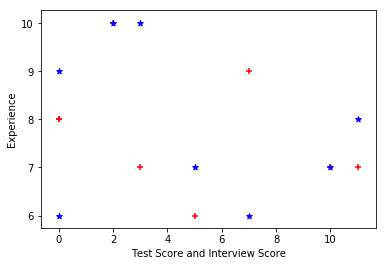

In [92]:
##checking the graph
%matplotlib inline
plt.ylabel('Experience')
plt.xlabel('Test Score and Interview Score')
plt.scatter(df.experience,df.test_score,color='red',marker='+')
plt.scatter(df.experience,df.interview_score,color='blue',marker='*')

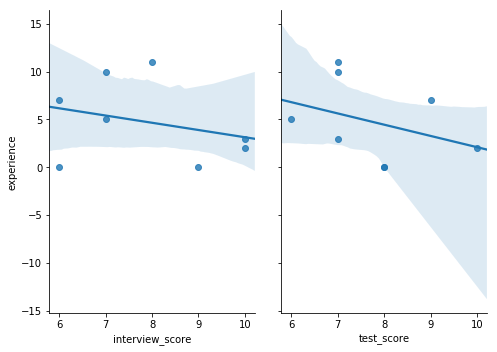

In [93]:
import seaborn as sns
sns.pairplot(df, x_vars=['interview_score','test_score'], y_vars='experience', size=5, aspect=0.7, kind='reg')

In [94]:
reg.predict([[2,9,6]])

array([53713.86677124])

In [95]:
reg.predict([[13,10,10]])

array([96670.06530153])

In [96]:
##x1,x2,x3...
reg.coef_

array([2922.26901502, 2221.30909959, 2147.48256637])

In [97]:
#b
reg.intercept_


14992.65144669314

In [98]:
2*2922.26901502+9*2221.30909959+6*2147.48256637+14992.65144669314

53713.86677126314

In [99]:
sal_pred=reg.predict(df[['experience','test_score','interview_score']])
df['sal_prediction']=sal_pred
df

,experience,test_score,interview_score,salary_in_Rs,sal_prediction
0,0,8.0,9,50000,52090.467341
1,0,8.0,6,45000,45648.019642
2,5,6.0,7,60000,57964.229084
3,2,10.0,10,65000,64525.106136
4,7,9.0,6,70000,68325.211846
5,3,7.0,10,62000,60783.447853
6,10,7.0,7,72000,74796.883259
7,11,7.0,8,80000,79866.634840


In [100]:
df.to_csv('salary_prediction.csv')

Linear Regression :


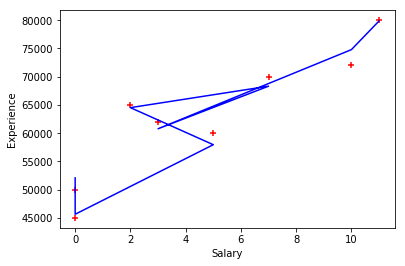

In [103]:
print('Linear Regression :')
plt.xlabel('Salary')
plt.ylabel('Experience')
plt.scatter(df.experience,df.salary_in_Rs,color='red',marker='+')
plt.plot(df.experience,df.sal_prediction,color='blue')
